## Problem Definition

The essence of this project is straightforward: to predict one's perfume preferences based on their past preferences.

Platforms such as Scentbird (2024) have experts handpick niche perfumes for subscribers, while Fragrantica (2023) employs a recommendation engine likely fueled by user reviews to offer suggestions. Independent creators (Longo, 2019) have also dabbled in using sentiment analysis for perfume recommendations, where a user inputs a sentence and the model discerns the 'vibe' of the perfume to generate suggestions through NLP techniques.

As a regular visitor of parfumo.com (Parfumo, 2024), a forum for perfume enthusiasts, I enjoy exploring and sharing new perfume releases and special finds with friends. This interest led me to create a model that predicts how likely I am to enjoy perfumes I come across online, especially those not available for testing in my country. The project was sparked by my disappointment with Diptyque's Philosykos; I anticipated enjoying its fig and coconut notes—my dessert favorites—only to discover they didn't appeal to me in perfume form.

While this project may not evolve into the next major startup, it is bound to bring myself and my friends considerable amusement.

## Data Story

My perfume dataset originates from a personal collection of fragrances I have tried over the years, noting which ones I liked or disliked. To enrich this data, I developed a web scraper (Appendix A) for parfumo.com, extracting detailed information about each perfume, including its name, brand, release year, fragrance notes, creators (perfumers), community rating, main accords, marketing company, and bottle image. I ran the scraper on two lists of URLs directly from parfumo.com (Appendix B), one list with perfumes I liked and one with those I disliked. I then concatenated them into one list, creating perfume_preferences.csv, where the Preference column describes whether I liked (1) or disliked (0) the perfume.

## Data Exploration

In this section, I conduct data exploration to guide the selection of features for the model. At this stage, I have chosen to exclude perfumers as a variable because of the significant number of missing values and the lack of a viable method to extrapolate the missing information from the available data. This reasoning also applies to the marketing company variable. Additionally, I have decided not to use the perfume names as they tend to be artistic rather than descriptive.

In [ ]:
import pandas as pd

# Load the dataset
data_path = '/work/notebook/data/perfume_preferences.csv'
df = pd.read_csv(data_path)

# Display the first few rows
df.head()

,Perfume Name,Brand,Release Year,Fragrance Notes,Perfumers,Rating,Main Accords,Marketing Company,Image Path,Preference
0,Gentle fluidity (Silver) Maison Francis Kurkdj...,Maison Francis Kurkdjian,2019.0,"Vanilla, Musk, Juniper berry, Woods, Coriander...",Francis Kurkdjian,8.2,"Fresh, Woody, Spicy, Aquatic, Green",LVMH,images/Gentle fluidity (Silver) Maison Francis...,1
1,Aoud Vanille Mancera 2015,Mancera,2015.0,"Nepalese oud, Cardamom, Saffron, Black pepper,...",NaN,8.0,"Sweet, Woody, Spicy, Oriental, Gourmand",NaN,images/Aoud Vanille Mancera 2015.jpg,1
2,Hayati Attar Collection,Attar Collection,2018.0,"Berry syrup, Raspberry, Blackcurrant, Floral n...",Yann Vasnier,7.2,"Sweet, Fruity, Synthetic, Creamy, Floral",NaN,images/Hayati Attar Collection.jpg,1
3,Vanillary Lush / Cosmetics To Go 2009 Perfume,Lush / Cosmetics To Go,2009.0,"Vanilla, Tonka bean, Coumarin, Jasmine",NaN,6.3,"Gourmand, Sweet, Spicy, Powdery, Creamy",NaN,images/Vanillary Lush _ Cosmetics To Go 2009 P...,1
4,English Pear & Freesia Jo Malone 2010 Cologne,Jo Malone,2010.0,"White freesia, Williams pear, Patchouli, Woods...",Christine Nagel,7.2,"Floral, Fruity, Fresh, Sweet, Green",Estēe Lauder Companies,images/English Pear & Freesia Jo Malone 2010 C...,1


In [ ]:
# Descriptive statistics for numerical columns
numerical_summary = df.describe()

# Checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

numerical_summary, missing_values, data_types

(       Release Year     Rating  Preference
 count     61.000000  61.000000   61.000000
 mean    2013.000000   7.459016    0.540984
 std       13.233795   0.640931    0.502453
 min     1921.000000   5.600000    0.000000
 25%     2010.000000   7.100000    0.000000
 50%     2016.000000   7.500000    1.000000
 75%     2018.000000   7.900000    1.000000
 max     2023.000000   8.700000    1.000000,
 Perfume Name          0
 Brand                 0
 Release Year          0
 Fragrance Notes       0
 Perfumers            14
 Rating                0
 Main Accords          0
 Marketing Company    16
 Image Path            0
 Preference            0
 dtype: int64,
 Perfume Name          object
 Brand                 object
 Release Year         float64
 Fragrance Notes       object
 Perfumers             object
 Rating               float64
 Main Accords          object
 Marketing Company     object
 Image Path            object
 Preference             int64
 dtype: object)

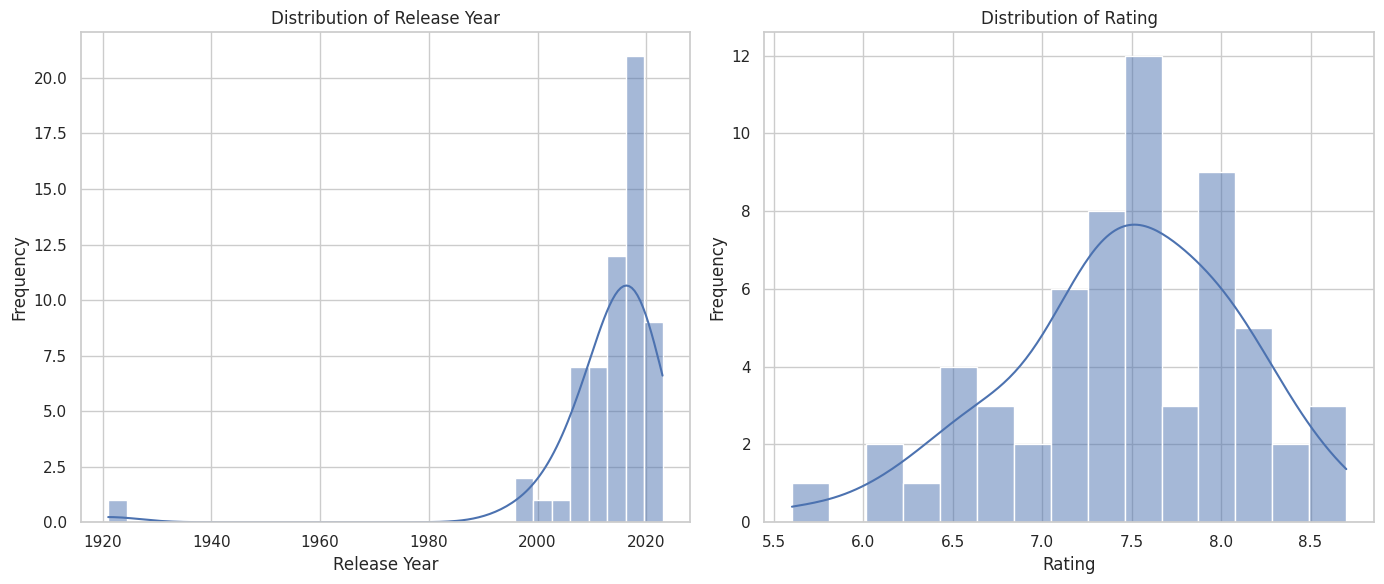

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters for seaborn
sns.set(style="whitegrid")

# Distribution of Release Year and Rating
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of Release Year
sns.histplot(df['Release Year'].dropna(), bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Release Year')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Frequency')

# Distribution of Rating
sns.histplot(df['Rating'], bins=15, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Rating')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

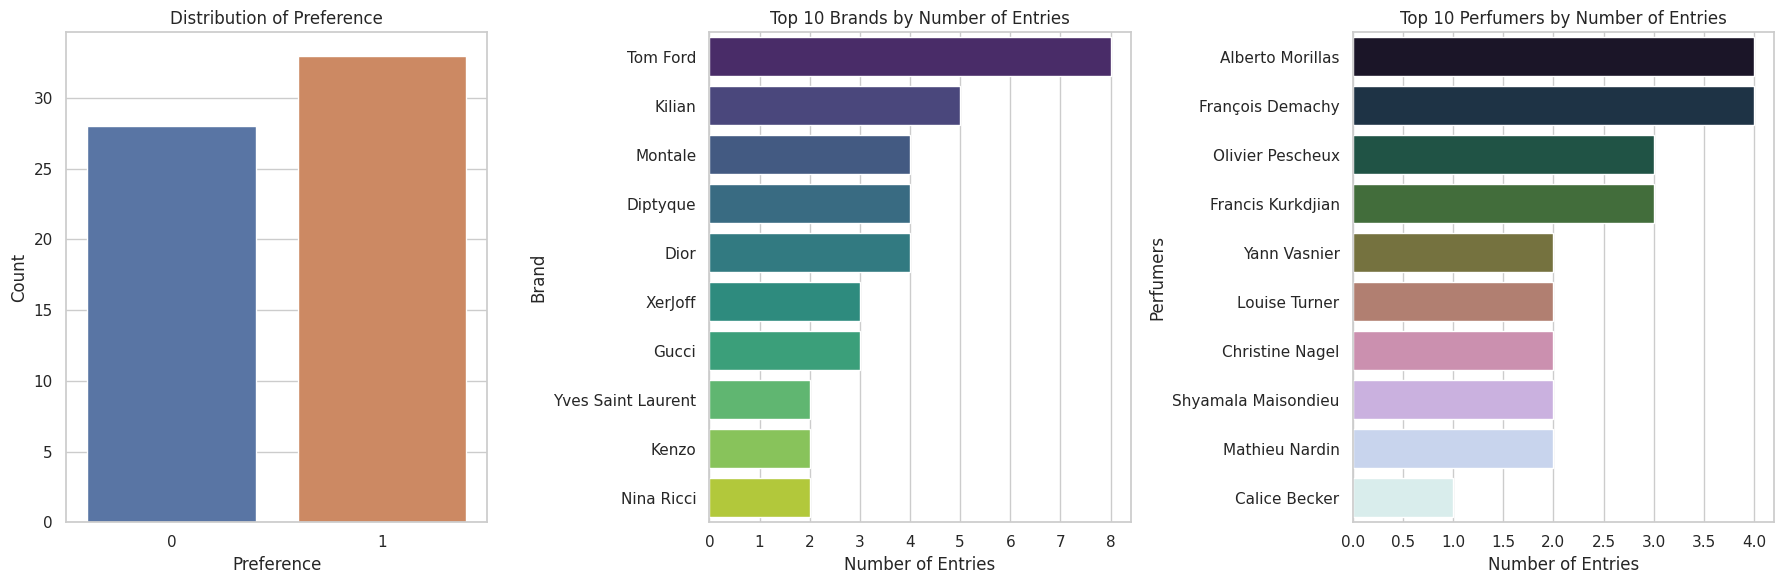

In [ ]:
# Setting up the figure for categorical variable distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of Preference
sns.countplot(x='Preference', data=df, ax=ax[0])
ax[0].set_title('Distribution of Preference')
ax[0].set_xlabel('Preference')
ax[0].set_ylabel('Count')

# Top 10 Brands by Number of Entries
top_brands = df['Brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, ax=ax[1], palette="viridis")
ax[1].set_title('Top 10 Brands by Number of Entries')
ax[1].set_xlabel('Number of Entries')
ax[1].set_ylabel('Brand')

# Top 10 Perfumers by Number of Entries
top_perfumers = df['Perfumers'].value_counts().head(10)
sns.barplot(x=top_perfumers.values, y=top_perfumers.index, ax=ax[2], palette="cubehelix")
ax[2].set_title('Top 10 Perfumers by Number of Entries')
ax[2].set_xlabel('Number of Entries')
ax[2].set_ylabel('Perfumers')

plt.tight_layout()
plt.show()

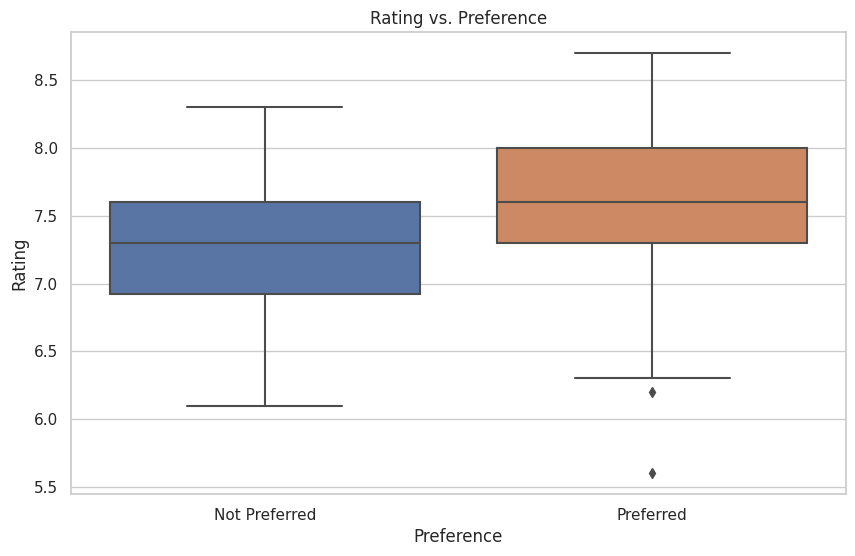

In [ ]:
# Relationship between Rating and Preference
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preference', y='Rating', data=df)
plt.title('Rating vs. Preference')
plt.xlabel('Preference')
plt.ylabel('Rating')
plt.xticks([0, 1], ['Not Preferred', 'Preferred'])
plt.show()

## Implementation

The code below constructs a Logistic Regression model to forecast personal perfume preferences. The steps are: 

1. Data Loading.

2. Feature Engineering.

2.1. Combining Textual Data: Merging "Fragrance Notes" and "Main Accords" into one feature creates a detailed profile for each perfume, encompassing its scent blend and key traits. This unified feature enhances the model's informativeness.
2.2. Tokenisation of Textual Data: The conversion of combined textual data into sequences of integers through tokenisation facilitates the processing of text as numerical data. The decision to tokenise is supported by the following project-specific considerations:
2.2.1. Loss of Sequential Information: The exact order of fragrance notes may not significantly impact preference prediction compared to the presence of these features.
2.2.2. Fixed Vocabulary Limit: A restricted vocabulary is manageable given the dataset's size, with important notes and accords likely being frequent.
2.2.3. Sparse Representations: Sparse matrix issues are less concerning in this small-scale project, where memory and speed inefficiencies are minor.
2.2.4. Generalisation Issues: The specialised nature of perfume descriptions, which are relatively uniform, minimises the risk of the model struggling with unfamiliar data, so generalisation issues are not an immediate  concern.

2.3. Handling Non-Textual Data.

2.3.1. Color Histogram Data: Processing color features from bottle images may reflect on preferences. Missing values are imputed with the mean to maintain dataset integrity.
2.3.2. Brand Encoding: Brands are one-hot encoded, transforming categorical into numerical data, recognising brand influence on preferences.
2.3.3. Release Year Standardisation: Applying StandardScaler to release years normalises this feature, aiding the model in interpreting perfume novelty without year scale bias.

3. Model Training and Evaluation.

3.1. Splitting the dataset for training and testing ensures the model's generalisation ability is tested, a central machine learning protocol.
3.2. Logistic Regression, known for its efficiency in binary classification, is applied to the training set.
3.3. Calculations of accuracy, precision, recall, and the F1 score provide initial insights into the model's performance. 
3.3.1. Accuracy tells us the proportion of total predictions that the model got correct, making it an intuitive metric for overall performance. Precision measures the proportion of positive identifications that were actually correct. Recall quantifies the proportion of actual positives that were correctly identified. F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall. 
3.3.2. We might want to pay particular attention to the recall metric. A higher recall means the model is good at catching positive instances, even at the risk of including some negatives (disliked perfumes) in the positives. This way, one might try a recommended perfume and conclude that they dislike it, which is more desirable than never considering a perfume one might have liked due to it being misclassified.
3.4. The confusion matrix breaks down predictions into four categories: true positives, true negatives, false positives, and false negatives, which gives a further insight into the distribution of errors in the predictions.
3.5. ROC-AUC score is used to assess the model's ability to distinguish between the two classes, liked and disliked perfumes.This metric is useful as it considers both the true positive rate and the false positive rate, providing a comprehensive measure of model performance across different threshold settings.
3.6. Leave-One-Out Cross-Validation (LOOCV) is used to evaluate the model's performance in a more granular and robust manner. LOOCV was chosen in favour of k-fold cross-validation as the small size of the dataset allows us to execute this more computationally expensive process. The average accuracy across all LOOCV folds gives an indication of how well the model is expected to perform on an unseen data point, providing an assessment of its generalisation capability.

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing
import seaborn as sns  # For statistical data visualisation
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
from sklearn.model_selection import train_test_split  # To split arrays or matrices into random train and test subsets
from sklearn.linear_model import LogisticRegression  # To apply the Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation metrics
from tensorflow.keras.preprocessing.text import Tokenizer  # To vectorise text corpus by turning text into sequences of integers
from tensorflow.keras.preprocessing.sequence import pad_sequences  # To transform a list of sequences into a 2D Numpy array
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical variables
from sklearn.impute import SimpleImputer  # For handling missing values in the dataset

# Load the dataset using pandas
df = pd.read_csv('/work/notebook/data/perfume_preferences_with_colour.csv')

# Combine "Fragrance Notes" and "Main Accords" into a single feature for analysis
df['combined_features'] = df['Fragrance Notes'] + ", " + df['Main Accords']

# Set up text tokeniser with a max vocabulary size
# 100 is a common choice for projects of this scale
# I have found that significantly increasing or reducing this number
    # hinders the model's performance
tokenizer = Tokenizer(num_words=100)
# Fit tokeniser on perfume features
tokenizer.fit_on_texts(df['combined_features'])
# Convert text to sequences of tokens
sequences = tokenizer.texts_to_sequences(df['combined_features'])

# Ensure uniform sequence length using TensorFlow's Keras API function
text_features = pad_sequences(sequences, padding='post')

# Get color histogram data
color_features = df.loc[:, df.columns.str.startswith('Color_Hist_')].values
# Fill missing color data with mean
color_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Normalise color data
color_features_normalized = color_imputer.fit_transform(color_features)

# Encode brand names into binary vectors
encoder = OneHotEncoder(sparse=False)
brand_encoded = encoder.fit_transform(df[['Brand']])

# Standardise release years
scaler_year = StandardScaler()
release_year_normalized = scaler_year.fit_transform(df[['Release Year']].values.reshape(-1, 1))

# Combine all preprocessed features into a single feature matrix for the Logistic Regression model
X = np.concatenate([text_features, color_features_normalized, brand_encoded, release_year_normalized], axis=1)

# Define the target variable "Preference" for model training and evaluation
y = df['Preference'].values

# Split the dataset into training and testing sets to evaluate the performance of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and fit the Logistic Regression model to the training data
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predict the preferences on the test data
y_pred = model.predict(X_test)

2024-02-18 22:09:45.769884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-18 22:09:45.875780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-18 22:09:45.875805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-18 22:09:45.894399: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 22:09:46.562872: W tensorflow/stream_executor/platform/de

In [ ]:
# Evaluate the accuracy of the model to see how well it performs on unseen data
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Model Accuracy: 0.7692307692307693
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1 Score: 0.7692307692307692


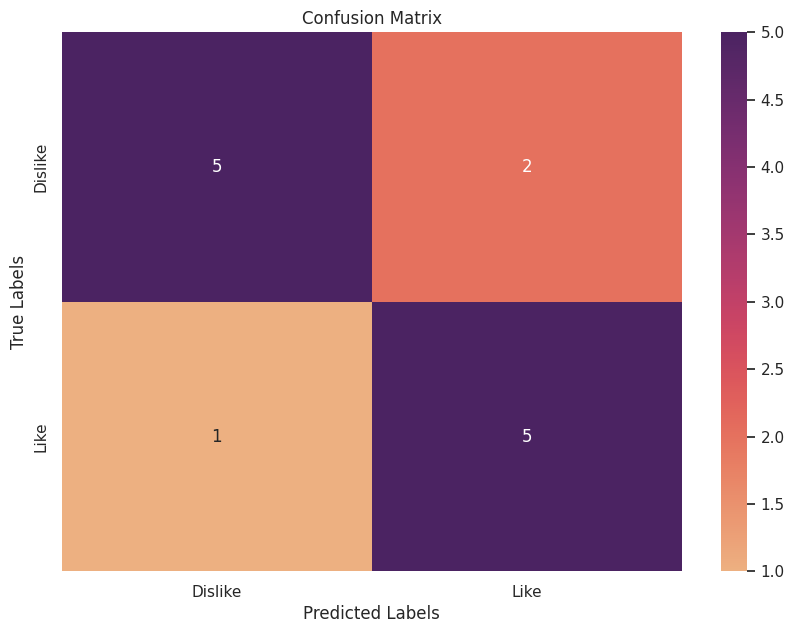

In [ ]:
# Calculate and visualise the confusion matrix using seaborn to understand the model's performance in more detail
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='flare', xticklabels=['Dislike', 'Like'], yticklabels=['Dislike', 'Like'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

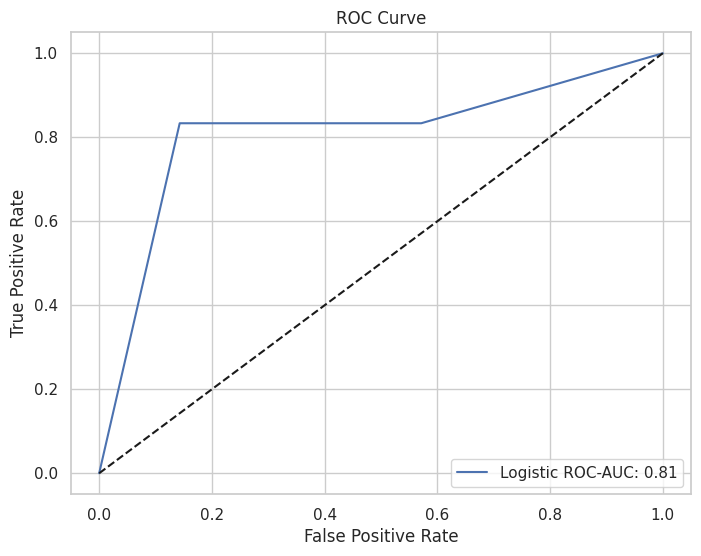

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probability estimates
logistic_preds = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC area for the model
logistic_roc_curve = roc_curve(y_test, logistic_preds)
logistic_auc_score = roc_auc_score(y_test, logistic_preds)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_roc_curve[0], logistic_roc_curve[1], label=f"Logistic ROC-AUC: {logistic_auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression

# Initialise LeaveOneOut cross-validator
loo = LeaveOneOut()

# Initialise the Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Store accuracies for each fold
accuracies = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracies.append(accuracy_score(y_test, y_pred))

# Calculate the average accuracy across all LOOCV folds
average_accuracy = np.mean(accuracies)
print("Average accuracy accross all LOOCV folds:", average_accuracy)

Average accuracy accross all LOOCV folds: 0.5245901639344263


## Executive Summary

This project embarked on developing a predictive model to discern individual perfume preferences, leveraging a dataset compiled through web scraping from parfumo.com, including the following variables: Perfume Name, Brand, Release Year, Fragrance Notes, Perfumers, Rating, Main Accords, Marketing Company, and Bottle Image. Data exploration helped narrow down on variables that would be used as input to the model, before which they were processed appropriately. The resulting model was evaluated using a comprehensive suite of metrics: accuracy, precision, recall, F1 score, ROC-AUC score, and Leave-One-Out Cross-Validation (LOOCV) accuracy, alongside a confusion matrix analysis.

The Logistic Regression model achieved an accuracy of 76.92%, indicating a high level of overall predictive correctness. With a precision of 71.43%, the model demonstrated a solid capability in minimising false positives. The recall rate of 83.33% underscores the model's effectiveness in identifying true positives, i.e., correctly predicting preferred perfumes. The F1 Score of 76.92% reveals a balanced performance between precision and recall, illustrating the model's robustness. The Logistic AUC-ROC score of 0.81 further highlights its discriminatory capacity between liked and disliked perfume classes across various decision thresholds. The confusion matrix revealed 5 true positives (TP), 5 true negatives (TN), 2 false positives (FP), and 1 false negative (FN), providing a granular view of the model's performance across different categories of predictions.

On the other hand, the average accuracy from LOOCV, at 52.46%, suggests variability in model performance when subjected to the rigorous test of leaving one out, indicating potential overfitting or underfitting issues, which would lead to generalisation issues down the line if not scrutinised at this stage.

For future improvements, integrating more nuanced features such as geographic origin and marketing strategies might enrich the model's predictive capability. Adjusting the target variable to predict the probability of liking a perfume could offer more granular insights, accommodating users' specific preferences. Using NLP to analyse textual data, in combination with historical preference data, could refine the predictive accuracy, particularly for personalised recommendations tailored to individual tastes and occasions. These enhancements necessitate careful consideration of data availability and the model's capacity to generalise from the provided inputs.

In conclusion, this project lays a foundational framework for personalised perfume recommendations, with significant potential for improvement through advanced feature engineering, modeling techniques, and a more nuanced approach to data analysis and evaluation metrics interpretation.

## Bibliography

ReferencesFragrantica. (2023). Perfume Finder. Fragrantica.com. https://www.fragrantica.com/perfume-finder/

Longo, C. (2019, February 7). Perfume Recommendations using Natural Language Processing. Medium; Towards Data Science. https://towardsdatascience.com/perfume-recommendations-using-natural-language-processing-ad3e6736074c

Parfumo. (2024). Perfumes, Reviews and Fragrance News. Parfumo.com. https://www.parfumo.com/

Scentbird. (2024). Scentbird Monthly Perfume Subscription Box. Scentbird.com. https://www.scentbird.com/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6e44cab6-b6e0-4b31-b1f5-f2c03ba85d3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>